In [1]:
# تثبيت مكتبة kaggle لتحميل البيانات
!pip install kaggle

# تحميل مجموعة البيانات من كاجل
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

# فك ضغط الملفات
import zipfile
import os

# تأكد من أن الملفات تم تحميلها في المكان الصحيح
zip_file_path = '/kaggle/working/chest-xray-pneumonia.zip'
unzip_dir = '/kaggle/working/chest_xray_pneumonia/'

# فك ضغط الملفات
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

# عرض الملفات والمجلدات التي تم فك ضغطها للتأكد
print(os.listdir(unzip_dir))


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100%|██████████████████████████████████████▉| 2.29G/2.29G [00:13<00:00, 212MB/s]
100%|███████████████████████████████████████| 2.29G/2.29G [00:13<00:00, 187MB/s]
['chest_xray']


In [6]:
train_dir = os.path.join(unzip_dir,'chest_xray/train')
test_dir = os.path.join(unzip_dir,'chest_xray/test')

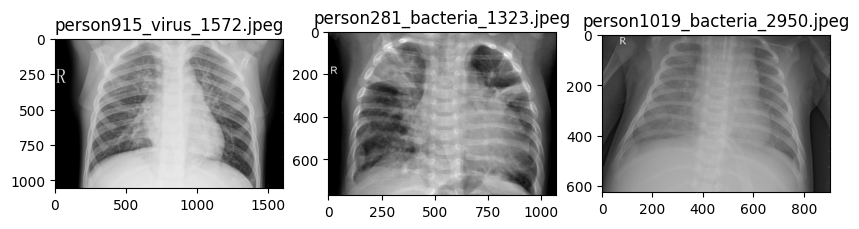

In [39]:
import matplotlib.pyplot as plt

def display_sample_img(directory,num_img=3):
    images = os.listdir(directory)[:num_img]
    plt.figure(figsize=(10,10))
    for i , img in enumerate(images):
        img_path = os.path.join(directory,img)
        image = plt.imread(img_path)
        plt.subplot(1,num_img,i+1)
        plt.imshow(image,cmap='gray')
        plt.title(img)
    plt.show 
    
class_dirs = os.listdir(train_dir)
first_class_dir = os.path.join(train_dir,class_dirs[1])
display_sample_img(first_class_dir)
        

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(  
    train_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary'
)

test_generator = test_datagen.flow_from_directory( 
    test_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'binary'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Flatten , Dense

model = Sequential([
    
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    
    MaxPooling2D(2, 2),
        
    Conv2D(64, (3,3) ,activation = 'relu' ),
    MaxPooling2D(2, 2),
        
    Flatten(),
    
    Dense(512, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model.compile(optimizer ='adam' , loss='binary_crossentropy', metrics = ['accuracy'])


history = model.fit(
    train_generator,
    epochs=10,
    validation_data= test_generator
)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/163 ━━━━━━━━━━━━━━━━━━━━ 23:15 9s/step - accuracy: 0.6875 - loss: 0.6805

I0000 00:00:1723662350.862074     695 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1723662350.880783     695 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


162/163 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.8170 - loss: 0.6262

W0000 00:00:1723662389.804391     692 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


163/163 ━━━━━━━━━━━━━━━━━━━━ 52s 270ms/step - accuracy: 0.8181 - loss: 0.6220 - val_accuracy: 0.7099 - val_loss: 1.2607
Epoch 2/10


W0000 00:00:1723662394.562082     692 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


163/163 ━━━━━━━━━━━━━━━━━━━━ 44s 257ms/step - accuracy: 0.9668 - loss: 0.0973 - val_accuracy: 0.7452 - val_loss: 0.9741
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 44s 256ms/step - accuracy: 0.9714 - loss: 0.0748 - val_accuracy: 0.7724 - val_loss: 0.8373
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 44s 258ms/step - accuracy: 0.9855 - loss: 0.0435 - val_accuracy: 0.7420 - val_loss: 1.2862
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 43s 255ms/step - accuracy: 0.9911 - loss: 0.0239 - val_accuracy: 0.6971 - val_loss: 1.9774
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 44s 262ms/step - accuracy: 0.9920 - loss: 0.0178 - val_accuracy: 0.7324 - val_loss: 1.5894
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 43s 257ms/step - accuracy: 0.9988 - loss: 0.0065 - val_accuracy: 0.7340 - val_loss: 1.8969
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 43s 256ms/step - accuracy: 0.9988 - loss: 0.0050 - val_accuracy: 0.7308 - val_loss: 2.4784
Epoch 9/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 44s 256ms/step - accuracy: 0.9938 - loss: 0.0152 - val

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 207ms/step - accuracy: 0.7402 - loss: 2.1208
Test Accuracy: 75.16%



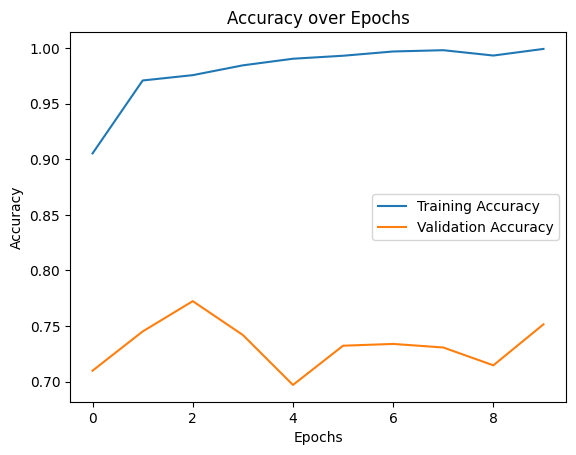

In [53]:
loss,accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')
print()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()